In [254]:
#import libraries
import pandas as pd
import numpy as np

#visual
import matplotlib.pyplot as plt

#KMeans
from sklearn.cluster import KMeans

#ggplot
from plotnine import *

## NSI Data Exploration

In [255]:
#create Data Frame for NSI
nsi_df = pd.read_csv("/Users/snehasarasani/Documents/NICoE/NSI_SS_DI.csv")

In [256]:
nsi_df.columns

Index(['PersonID', 'AutoID', 'SurveyVersionId', 'SurveyOrderId', 'Created',
       'Updated', 'SourceSystem', 'SourceId', 'q1_feelingDizzy',
       'q2_lossBalance', 'q3_poorCoordination', 'q4_headaches', 'q5_nausea',
       'q6_visionProblems', 'q7_lightSensitivity', 'q8_hearingDifficulty',
       'q9_noiseSensitivity', 'q10_numbnessTingling', 'q11_changeTaste',
       'q12_changeAppetite', 'q13_poorConcentration', 'q14_forgetfulness',
       'q15_difficultyDecisions', 'q16_slowedThinking', 'q17_fatigue',
       'q18_difficultySleeping', 'q19_feelingAnxious', 'q20_feelingDepressed',
       'q21_irritability', 'q22_poorTolerance', 'SomaticSensory', 'Affective',
       'totalScore', 'Cicerone_Physical', 'Cicerone_Cognitive',
       'Cicerone_Affective', 'Cicerone_Sensory', 'Cognitive', 'Completed',
       'OrderType', 'SurveySession', 'FacilityName', 'CompletedDate'],
      dtype='object')

In [257]:
#divide into admissions and discharges
nsi_df_adm = nsi_df[nsi_df.SurveySession == 'Admission']
nsi_df_dis = nsi_df[nsi_df.SurveySession == 'Discharge']

In [258]:
##print shape
print("No. of rows and columns in admission: ", nsi_df_adm.shape)
print("No. of rows and columns in discharge: ", nsi_df_dis.shape)

No. of rows and columns in admission:  (1798, 43)
No. of rows and columns in discharge:  (1628, 43)


In [259]:
#unique person ID 
unique_personids_adm = nsi_df_adm.PersonID.unique()
unique_personids_dis = nsi_df_dis.PersonID.unique()

In [260]:
#find patients who have taken the survey for admissions AND discharge -- common Patients
common_patientIDs = list(set(unique_personids_adm).intersection(unique_personids_dis))

In [261]:
#create new DF with common patients
nsi_df_adm_com = nsi_df_adm[nsi_df_adm.PersonID.isin(common_patientIDs)]
nsi_df_dis_com = nsi_df_dis[nsi_df_dis.PersonID.isin(common_patientIDs)]

In [262]:
#print number of patients in both lists
print("No. of rows and columns in admission: ", nsi_df_adm_com.shape)
print("No. of rows and columns in discharge: ", nsi_df_dis_com.shape)

No. of rows and columns in admission:  (1593, 43)
No. of rows and columns in discharge:  (1591, 43)


In [263]:
#Drop duplicates in NSI admissions and discharges
nsi_df_adm_drop_dup = nsi_df_adm_com.drop_duplicates()
nsi_df_dis_drop_dup = nsi_df_dis_com.drop_duplicates()

In [264]:
print("NSI admissions: ", nsi_df_adm_drop_dup.shape)
print("NSI discharges: ", nsi_df_dis_drop_dup.shape)

NSI admissions:  (1593, 43)
NSI discharges:  (1591, 43)


### Drop Duplicates in admissions

In [265]:
#NSI_Admin_duplicates
nsi_df_adm_drop_dup.PersonID.value_counts()

1440    2
80      2
1829    1
1208    1
1188    1
       ..
591     1
595     1
597     1
599     1
2       1
Name: PersonID, Length: 1591, dtype: int64

In [266]:
#details of each duplicate person ID  in NSI_Admin
nsi_df_adm_drop_dup[nsi_df_adm_drop_dup.PersonID==1440]

,PersonID,AutoID,SurveyVersionId,SurveyOrderId,Created,Updated,SourceSystem,SourceId,q1_feelingDizzy,q2_lossBalance,...,Cicerone_Physical,Cicerone_Cognitive,Cicerone_Affective,Cicerone_Sensory,Cognitive,Completed,OrderType,SurveySession,FacilityName,CompletedDate
2703,1440,26462,3403,127570,2/13/20 12:48,NaN,WIIR,NaN,1.0,1.0,...,1.17,2.8,2.75,1.43,3.0,-1,IOP,Admission,NICoE Bethesda,5/5/14 0:00
2704,1440,26463,3403,127571,2/13/20 12:48,NaN,WIIR,NaN,1.0,2.0,...,1.33,2.0,2.00,1.57,2.0,-1,IOP,Admission,NICoE Bethesda,6/30/14 0:00


In [267]:
#location for 2704
temp_1440 = nsi_df_adm_drop_dup.loc[2704]

In [268]:
#replace 2704 with 2703 to match with date of discharge for patient 1440
nsi_df_adm_drop_dup.loc[2703] = temp_1440

In [269]:
nsi_df_adm_drop_dup[nsi_df_adm_drop_dup.PersonID==1440]

,PersonID,AutoID,SurveyVersionId,SurveyOrderId,Created,Updated,SourceSystem,SourceId,q1_feelingDizzy,q2_lossBalance,...,Cicerone_Physical,Cicerone_Cognitive,Cicerone_Affective,Cicerone_Sensory,Cognitive,Completed,OrderType,SurveySession,FacilityName,CompletedDate
2703,1440,26463,3403,127571,2/13/20 12:48,NaN,WIIR,NaN,1.0,2.0,...,1.33,2.0,2.0,1.57,2.0,-1,IOP,Admission,NICoE Bethesda,6/30/14 0:00
2704,1440,26463,3403,127571,2/13/20 12:48,NaN,WIIR,NaN,1.0,2.0,...,1.33,2.0,2.0,1.57,2.0,-1,IOP,Admission,NICoE Bethesda,6/30/14 0:00


In [270]:
#details of each duplicate person ID  in NSI_Admin
nsi_df_adm_drop_dup[nsi_df_adm_drop_dup.PersonID==80]

,PersonID,AutoID,SurveyVersionId,SurveyOrderId,Created,Updated,SourceSystem,SourceId,q1_feelingDizzy,q2_lossBalance,...,Cicerone_Physical,Cicerone_Cognitive,Cicerone_Affective,Cicerone_Sensory,Cognitive,Completed,OrderType,SurveySession,FacilityName,CompletedDate
252,80,21509,3403,122613,2/13/20 12:47,NaN,WIIR,NaN,0.0,2.0,...,1.50,2.4,2.75,1.0,2.25,-1,IOP,Admission,NICoE Bethesda,1/5/16 0:00
254,80,21511,3403,122615,2/13/20 12:47,NaN,WIIR,NaN,1.0,1.0,...,1.17,3.4,2.50,1.0,3.25,-1,IOP,Admission,NICoE Bethesda,10/5/15 0:00


In [271]:
#location for 252
temp_80 = nsi_df_adm_drop_dup.loc[252]

In [272]:
#NSI Discharge
nsi_df_dis[nsi_df_dis.PersonID==80]

,PersonID,AutoID,SurveyVersionId,SurveyOrderId,Created,Updated,SourceSystem,SourceId,q1_feelingDizzy,q2_lossBalance,...,Cicerone_Physical,Cicerone_Cognitive,Cicerone_Affective,Cicerone_Sensory,Cognitive,Completed,OrderType,SurveySession,FacilityName,CompletedDate
253,80,21510,3403,122614,2/13/20 12:47,NaN,WIIR,NaN,2.0,1.0,...,1.0,0.6,0.25,0.43,0.75,-1,IOP,Discharge,NICoE Bethesda,2/11/16 0:00


In [273]:
temp_80 = nsi_df_adm_drop_dup.loc[252]

In [274]:
nsi_df_adm_drop_dup.loc[254] = temp_80

In [275]:
nsi_df_adm_drop_dup_new = nsi_df_adm_drop_dup.drop_duplicates(['PersonID'])

In [276]:
nsi_df_adm_drop_dup_new.PersonID.value_counts()

1829    1
1178    1
1184    1
1186    1
1188    1
       ..
591     1
595     1
597     1
599     1
2       1
Name: PersonID, Length: 1591, dtype: int64

#### Duplicates in Discharge

In [277]:
#NSI_Discharge_duplicates -- none found
nsi_df_dis_drop_dup.PersonID.value_counts()

1829    1
1178    1
1184    1
1186    1
1188    1
       ..
591     1
595     1
597     1
599     1
2       1
Name: PersonID, Length: 1591, dtype: int64

### Drop Null values in NSI Admin

In [278]:
nsi_df_adm_drop_dup.columns

Index(['PersonID', 'AutoID', 'SurveyVersionId', 'SurveyOrderId', 'Created',
       'Updated', 'SourceSystem', 'SourceId', 'q1_feelingDizzy',
       'q2_lossBalance', 'q3_poorCoordination', 'q4_headaches', 'q5_nausea',
       'q6_visionProblems', 'q7_lightSensitivity', 'q8_hearingDifficulty',
       'q9_noiseSensitivity', 'q10_numbnessTingling', 'q11_changeTaste',
       'q12_changeAppetite', 'q13_poorConcentration', 'q14_forgetfulness',
       'q15_difficultyDecisions', 'q16_slowedThinking', 'q17_fatigue',
       'q18_difficultySleeping', 'q19_feelingAnxious', 'q20_feelingDepressed',
       'q21_irritability', 'q22_poorTolerance', 'SomaticSensory', 'Affective',
       'totalScore', 'Cicerone_Physical', 'Cicerone_Cognitive',
       'Cicerone_Affective', 'Cicerone_Sensory', 'Cognitive', 'Completed',
       'OrderType', 'SurveySession', 'FacilityName', 'CompletedDate'],
      dtype='object')

In [279]:
#display data with the top 5 entries
nsi_df_adm_drop_dup.head()

,PersonID,AutoID,SurveyVersionId,SurveyOrderId,Created,Updated,SourceSystem,SourceId,q1_feelingDizzy,q2_lossBalance,...,Cicerone_Physical,Cicerone_Cognitive,Cicerone_Affective,Cicerone_Sensory,Cognitive,Completed,OrderType,SurveySession,FacilityName,CompletedDate
0,1244,9214,3403,73594,10/15/19 10:28,NaN,NICoE_CMT,31411.0,2.0,2.0,...,1.17,3.6,2.75,3.00,3.5,-1,IOP,Admission,NICoE Bethesda,10/15/19 14:28
1,1341,9215,3403,73581,10/15/19 10:37,NaN,NICoE_CMT,17730.0,0.0,0.0,...,1.00,2.0,3.00,1.71,2.0,-1,IOP,Admission,NICoE Bethesda,10/15/19 14:37
2,256,9216,3403,73607,10/15/19 10:43,NaN,NICoE_CMT,29949.0,0.0,0.0,...,0.50,1.2,1.25,1.29,1.0,-1,IOP,Admission,NICoE Bethesda,10/15/19 14:43
3,127,9217,3403,73620,10/15/19 10:58,NaN,NICoE_CMT,2147.0,1.0,1.0,...,0.83,3.4,2.50,1.57,3.5,-1,IOP,Admission,NICoE Bethesda,10/15/19 14:58
8,1770,9228,3403,76892,10/21/19 9:03,NaN,NICoE_CMT,32009.0,1.0,1.0,...,1.33,3.0,4.00,2.14,3.0,-1,IOP,Admission,NICoE Bethesda,10/21/19 13:03


In [280]:
nsi_df_adm_drop_dup.PersonID.value_counts()

1440    2
80      2
1829    1
1208    1
1188    1
       ..
591     1
595     1
597     1
599     1
2       1
Name: PersonID, Length: 1591, dtype: int64

In [281]:
nsi_df_adm_drop_dup_new.PersonID.value_counts()

1829    1
1178    1
1184    1
1186    1
1188    1
       ..
591     1
595     1
597     1
599     1
2       1
Name: PersonID, Length: 1591, dtype: int64

In [282]:
nsi_df_adm_drop_dup = nsi_df_adm_drop_dup_new.copy()

In [283]:
#only choose the question columns
question_cols = [col for col in nsi_df_adm_drop_dup if col.startswith('q')]

In [284]:
#find null values in each question column
nsi_df_adm_drop_dup[question_cols].isna().sum()

q1_feelingDizzy             6
q2_lossBalance              1
q3_poorCoordination         4
q4_headaches                6
q5_nausea                   5
q6_visionProblems           1
q7_lightSensitivity         4
q8_hearingDifficulty        4
q9_noiseSensitivity         3
q10_numbnessTingling        4
q11_changeTaste             8
q12_changeAppetite          7
q13_poorConcentration       8
q14_forgetfulness           5
q15_difficultyDecisions     4
q16_slowedThinking          6
q17_fatigue                 7
q18_difficultySleeping      5
q19_feelingAnxious          6
q20_feelingDepressed        8
q21_irritability            9
q22_poorTolerance          10
dtype: int64

In [285]:
#NSI admissions 
nsi_df_adm_drop_dup[question_cols].dropna().shape

(1530, 22)

In [286]:
#drop NA/Null values and create a new data frame
data_admin_new = nsi_df_adm_drop_dup[question_cols].dropna()

In [287]:
#check if null values are dropped
data_admin_new.isna().sum()

q1_feelingDizzy            0
q2_lossBalance             0
q3_poorCoordination        0
q4_headaches               0
q5_nausea                  0
q6_visionProblems          0
q7_lightSensitivity        0
q8_hearingDifficulty       0
q9_noiseSensitivity        0
q10_numbnessTingling       0
q11_changeTaste            0
q12_changeAppetite         0
q13_poorConcentration      0
q14_forgetfulness          0
q15_difficultyDecisions    0
q16_slowedThinking         0
q17_fatigue                0
q18_difficultySleeping     0
q19_feelingAnxious         0
q20_feelingDepressed       0
q21_irritability           0
q22_poorTolerance          0
dtype: int64

In [288]:
data_admin_new

,q1_feelingDizzy,q2_lossBalance,q3_poorCoordination,q4_headaches,q5_nausea,q6_visionProblems,q7_lightSensitivity,q8_hearingDifficulty,q9_noiseSensitivity,q10_numbnessTingling,...,q13_poorConcentration,q14_forgetfulness,q15_difficultyDecisions,q16_slowedThinking,q17_fatigue,q18_difficultySleeping,q19_feelingAnxious,q20_feelingDepressed,q21_irritability,q22_poorTolerance
0,2.0,2.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,...,4.0,4.0,2.0,4.0,4.0,4.0,2.0,2.0,4.0,3.0
1,0.0,0.0,2.0,1.0,0.0,2.0,1.0,2.0,2.0,2.0,...,2.0,3.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0
2,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0,...,1.0,2.0,0.0,1.0,2.0,2.0,1.0,0.0,3.0,1.0
3,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,3.0,...,3.0,4.0,3.0,4.0,3.0,1.0,3.0,1.0,3.0,3.0
8,1.0,1.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0,0.0,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,2.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,2.0
3406,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,...,3.0,3.0,2.0,3.0,2.0,3.0,2.0,1.0,2.0,2.0
3407,1.0,2.0,2.0,1.0,0.0,1.0,2.0,2.0,4.0,3.0,...,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0
3413,2.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,...,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [289]:
adm_nsi_df = nsi_df_adm_drop_dup_new[['PersonID']].merge(data_admin_new, how='inner', left_index=True, right_index=True)

In [290]:
adm_nsi_df

,PersonID,q1_feelingDizzy,q2_lossBalance,q3_poorCoordination,q4_headaches,q5_nausea,q6_visionProblems,q7_lightSensitivity,q8_hearingDifficulty,q9_noiseSensitivity,...,q13_poorConcentration,q14_forgetfulness,q15_difficultyDecisions,q16_slowedThinking,q17_fatigue,q18_difficultySleeping,q19_feelingAnxious,q20_feelingDepressed,q21_irritability,q22_poorTolerance
0,1244,2.0,2.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,...,4.0,4.0,2.0,4.0,4.0,4.0,2.0,2.0,4.0,3.0
1,1341,0.0,0.0,2.0,1.0,0.0,2.0,1.0,2.0,2.0,...,2.0,3.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0
2,256,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,2.0,...,1.0,2.0,0.0,1.0,2.0,2.0,1.0,0.0,3.0,1.0
3,127,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,...,3.0,4.0,3.0,4.0,3.0,1.0,3.0,1.0,3.0,3.0
8,1770,1.0,1.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,1317,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,2.0
3406,216,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,...,3.0,3.0,2.0,3.0,2.0,3.0,2.0,1.0,2.0,2.0
3407,822,1.0,2.0,2.0,1.0,0.0,1.0,2.0,2.0,4.0,...,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0
3413,1382,2.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,...,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


### Drop Null values in NSI Discharge

In [291]:
nsi_df_dis_drop_dup.columns

Index(['PersonID', 'AutoID', 'SurveyVersionId', 'SurveyOrderId', 'Created',
       'Updated', 'SourceSystem', 'SourceId', 'q1_feelingDizzy',
       'q2_lossBalance', 'q3_poorCoordination', 'q4_headaches', 'q5_nausea',
       'q6_visionProblems', 'q7_lightSensitivity', 'q8_hearingDifficulty',
       'q9_noiseSensitivity', 'q10_numbnessTingling', 'q11_changeTaste',
       'q12_changeAppetite', 'q13_poorConcentration', 'q14_forgetfulness',
       'q15_difficultyDecisions', 'q16_slowedThinking', 'q17_fatigue',
       'q18_difficultySleeping', 'q19_feelingAnxious', 'q20_feelingDepressed',
       'q21_irritability', 'q22_poorTolerance', 'SomaticSensory', 'Affective',
       'totalScore', 'Cicerone_Physical', 'Cicerone_Cognitive',
       'Cicerone_Affective', 'Cicerone_Sensory', 'Cognitive', 'Completed',
       'OrderType', 'SurveySession', 'FacilityName', 'CompletedDate'],
      dtype='object')

In [292]:
nsi_df_dis_drop_dup

,PersonID,AutoID,SurveyVersionId,SurveyOrderId,Created,Updated,SourceSystem,SourceId,q1_feelingDizzy,q2_lossBalance,...,Cicerone_Physical,Cicerone_Cognitive,Cicerone_Affective,Cicerone_Sensory,Cognitive,Completed,OrderType,SurveySession,FacilityName,CompletedDate
4,869,9219,3403,74698,10/16/19 7:51,NaN,NICoE_CMT,29729.0,0.0,0.0,...,0.17,0.2,0.25,0.29,0.00,-1,IOP,Discharge,NICoE Bethesda,10/16/19 11:51
5,895,9220,3403,74791,10/16/19 14:43,NaN,NICoE_CMT,24813.0,0.0,0.0,...,0.00,0.2,0.00,0.43,0.25,-1,IOP,Discharge,NICoE Bethesda,10/16/19 18:43
6,1428,9221,3403,74804,10/16/19 14:44,NaN,NICoE_CMT,24142.0,1.0,1.0,...,0.83,1.4,2.00,0.71,1.75,-1,IOP,Discharge,NICoE Bethesda,10/16/19 18:44
7,1345,9222,3403,74817,10/16/19 14:49,NaN,NICoE_CMT,24773.0,1.0,1.0,...,1.00,2.0,1.25,1.14,2.00,-1,IOP,Discharge,NICoE Bethesda,10/16/19 18:49
12,1314,9238,3403,77179,10/24/19 13:01,NaN,NICoE_CMT,29973.0,3.0,1.0,...,1.50,0.2,1.00,0.71,0.25,-1,IOP,Discharge,NICoE Bethesda,10/24/19 17:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,1317,29858,5221,133527,3/31/20 5:46,NaN,NICoE_CMT,36684.0,1.0,0.0,...,0.33,0.8,0.25,1.14,0.75,-1,IOP,Discharge,NICoE Bethesda,3/31/20 9:46
3422,822,29865,5221,133252,3/31/20 15:06,NaN,NICoE_CMT,15734.0,1.0,1.0,...,0.50,1.2,0.50,1.00,1.00,-1,IOP,Discharge,NICoE Bethesda,3/31/20 19:06
3423,216,29866,5221,133434,3/31/20 15:22,NaN,NICoE_CMT,40115.0,2.0,2.0,...,1.83,3.4,3.00,2.14,3.75,-1,IOP,Discharge,NICoE Bethesda,3/31/20 19:22
3424,1382,29893,5221,136153,4/6/20 21:47,NaN,NICoE_CMT,44814.0,0.0,0.0,...,0.17,1.0,0.75,0.43,1.00,-1,IOP,Discharge,NICoE Bethesda,4/7/20 1:47


In [293]:
nsi_df_dis_drop_dup.PersonID.value_counts()

1829    1
1178    1
1184    1
1186    1
1188    1
       ..
591     1
595     1
597     1
599     1
2       1
Name: PersonID, Length: 1591, dtype: int64

In [294]:
#only choose the question columns
question_cols = [col for col in nsi_df_adm_drop_dup if col.startswith('q')]

In [295]:
nsi_df_dis_drop_dup[question_cols].isna().sum()

q1_feelingDizzy            1
q2_lossBalance             2
q3_poorCoordination        3
q4_headaches               1
q5_nausea                  1
q6_visionProblems          2
q7_lightSensitivity        3
q8_hearingDifficulty       3
q9_noiseSensitivity        4
q10_numbnessTingling       1
q11_changeTaste            2
q12_changeAppetite         3
q13_poorConcentration      4
q14_forgetfulness          1
q15_difficultyDecisions    2
q16_slowedThinking         2
q17_fatigue                8
q18_difficultySleeping     1
q19_feelingAnxious         3
q20_feelingDepressed       2
q21_irritability           5
q22_poorTolerance          4
dtype: int64

In [296]:
nsi_df_dis_drop_dup[question_cols].dropna().shape

(1557, 22)

In [297]:
#drop NA/Null values and create a new data frame
data_dis_new = nsi_df_dis_drop_dup[question_cols].dropna()

In [298]:
data_dis_new.isna().sum()

q1_feelingDizzy            0
q2_lossBalance             0
q3_poorCoordination        0
q4_headaches               0
q5_nausea                  0
q6_visionProblems          0
q7_lightSensitivity        0
q8_hearingDifficulty       0
q9_noiseSensitivity        0
q10_numbnessTingling       0
q11_changeTaste            0
q12_changeAppetite         0
q13_poorConcentration      0
q14_forgetfulness          0
q15_difficultyDecisions    0
q16_slowedThinking         0
q17_fatigue                0
q18_difficultySleeping     0
q19_feelingAnxious         0
q20_feelingDepressed       0
q21_irritability           0
q22_poorTolerance          0
dtype: int64

In [299]:
data_dis_new

,q1_feelingDizzy,q2_lossBalance,q3_poorCoordination,q4_headaches,q5_nausea,q6_visionProblems,q7_lightSensitivity,q8_hearingDifficulty,q9_noiseSensitivity,q10_numbnessTingling,...,q13_poorConcentration,q14_forgetfulness,q15_difficultyDecisions,q16_slowedThinking,q17_fatigue,q18_difficultySleeping,q19_feelingAnxious,q20_feelingDepressed,q21_irritability,q22_poorTolerance
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,2.0,2.0,1.0,2.0,0.0,1.0,2.0,2.0,3.0,1.0
7,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,0.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,2.0
12,3.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,3.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3422,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0
3423,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,4.0,4.0,3.0,4.0,2.0,3.0,3.0,2.0,4.0,3.0
3424,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [300]:
dis_nsi_df = nsi_df_dis_drop_dup[['PersonID']].merge(data_dis_new, how='inner', left_index=True, right_index=True)

In [301]:
dis_nsi_df

,PersonID,q1_feelingDizzy,q2_lossBalance,q3_poorCoordination,q4_headaches,q5_nausea,q6_visionProblems,q7_lightSensitivity,q8_hearingDifficulty,q9_noiseSensitivity,...,q13_poorConcentration,q14_forgetfulness,q15_difficultyDecisions,q16_slowedThinking,q17_fatigue,q18_difficultySleeping,q19_feelingAnxious,q20_feelingDepressed,q21_irritability,q22_poorTolerance
4,869,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,895,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1428,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,2.0,2.0,1.0,2.0,0.0,1.0,2.0,2.0,3.0,1.0
7,1345,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,2.0
12,1314,3.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,1317,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,3.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3422,822,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0
3423,216,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,...,4.0,4.0,3.0,4.0,2.0,3.0,3.0,2.0,4.0,3.0
3424,1382,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


### Common patient IDS

In [302]:
#unique person ID 
unique_id_adm = adm_nsi_df.PersonID.unique()
unique_id_dis = dis_nsi_df.PersonID.unique()

In [303]:
#find patients who have taken the survey for admissions AND discharge -- common Patients
common_patientID = list(set(unique_id_adm).intersection(unique_id_dis))

In [304]:
#create new DF with common patients
nsi_df_adm_c = adm_nsi_df[adm_nsi_df.PersonID.isin(common_patientID)]
nsi_df_dis_c = dis_nsi_df[dis_nsi_df.PersonID.isin(common_patientID)]

In [305]:
#print number of patients in both lists
print("No. of rows and columns in admission: ", nsi_df_adm_c.shape)
print("No. of rows and columns in discharge: ", nsi_df_dis_c.shape)

No. of rows and columns in admission:  (1499, 23)
No. of rows and columns in discharge:  (1499, 23)


In [306]:
#only choose the question columns

nsi_cols = [col for col in nsi_df_adm_c if col.startswith('q')]
nsi_adm_temp = nsi_df_adm_c[nsi_cols]
nsi_dis_temp = nsi_df_dis_c[nsi_cols]

In [307]:
nsi_adm_temp

,q1_feelingDizzy,q2_lossBalance,q3_poorCoordination,q4_headaches,q5_nausea,q6_visionProblems,q7_lightSensitivity,q8_hearingDifficulty,q9_noiseSensitivity,q10_numbnessTingling,...,q13_poorConcentration,q14_forgetfulness,q15_difficultyDecisions,q16_slowedThinking,q17_fatigue,q18_difficultySleeping,q19_feelingAnxious,q20_feelingDepressed,q21_irritability,q22_poorTolerance
0,2.0,2.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,...,4.0,4.0,2.0,4.0,4.0,4.0,2.0,2.0,4.0,3.0
1,0.0,0.0,2.0,1.0,0.0,2.0,1.0,2.0,2.0,2.0,...,2.0,3.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0
2,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0,...,1.0,2.0,0.0,1.0,2.0,2.0,1.0,0.0,3.0,1.0
3,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,3.0,...,3.0,4.0,3.0,4.0,3.0,1.0,3.0,1.0,3.0,3.0
8,1.0,1.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0,0.0,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,2.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,2.0
3406,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,...,3.0,3.0,2.0,3.0,2.0,3.0,2.0,1.0,2.0,2.0
3407,1.0,2.0,2.0,1.0,0.0,1.0,2.0,2.0,4.0,3.0,...,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0
3413,2.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,...,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [308]:
nsi_dis_temp

,q1_feelingDizzy,q2_lossBalance,q3_poorCoordination,q4_headaches,q5_nausea,q6_visionProblems,q7_lightSensitivity,q8_hearingDifficulty,q9_noiseSensitivity,q10_numbnessTingling,...,q13_poorConcentration,q14_forgetfulness,q15_difficultyDecisions,q16_slowedThinking,q17_fatigue,q18_difficultySleeping,q19_feelingAnxious,q20_feelingDepressed,q21_irritability,q22_poorTolerance
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,2.0,2.0,1.0,2.0,0.0,1.0,2.0,2.0,3.0,1.0
7,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,0.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,2.0
12,3.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,3.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3422,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0
3423,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,4.0,4.0,3.0,4.0,2.0,3.0,3.0,2.0,4.0,3.0
3424,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


### Find the optimal number of clusters for Admissions using KMeans

In [309]:
#plot the sum of squares error with a for loop from clusters ex.1-20
#Lists for sum of squared distances, no of clusters, and cluster centers
ss_distances = []
no_of_clusters = []
cluster_centers_ = []

for k in range(1,20):
    print("Number of cluster: ", k)
    #kmeans
    kmeans = KMeans(n_clusters=k, max_iter=100, verbose=0, random_state=3)
    kmeans.fit(nsi_adm_temp) #admission df 2
    no_of_clusters.append(k) 
    cluster_centers_.append(k)
    ss_distances.append(kmeans.inertia_)

Number of cluster:  1
Number of cluster:  2
Number of cluster:  3
Number of cluster:  4
Number of cluster:  5
Number of cluster:  6
Number of cluster:  7
Number of cluster:  8
Number of cluster:  9
Number of cluster:  10
Number of cluster:  11
Number of cluster:  12
Number of cluster:  13
Number of cluster:  14
Number of cluster:  15
Number of cluster:  16
Number of cluster:  17
Number of cluster:  18
Number of cluster:  19


In [310]:
#kmeans.intertia_ is the Sum of squared distances of samples to their closest cluster center
ss_distances

[40307.96664442959,
 28279.96624595782,
 25333.15991336832,
 24124.239528742113,
 23241.9626127974,
 22583.767255055027,
 22135.505723513554,
 21732.535981107445,
 21404.699501317784,
 21117.77581358423,
 20876.308435129267,
 20611.809770112213,
 20385.20825062254,
 20165.388926166695,
 19980.209836806105,
 19820.22390984618,
 19677.660146627506,
 19516.20798278154,
 19368.09998526495]

In [311]:
no_of_clusters

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [312]:
print(kmeans.labels_)

[13 15 10 ... 11 15  2]


### Elbow Method

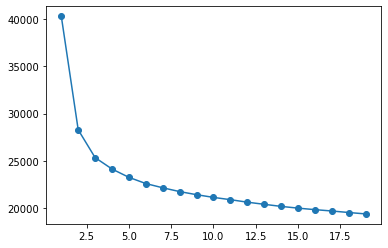

In [313]:
plt.plot(no_of_clusters, ss_distances, marker='o')

In [314]:
#elobow plot shows 4 clusters as the optimal value for k
kmeans = KMeans(n_clusters=4, max_iter=100, verbose=0, random_state=0)
kmeans.fit(nsi_adm_temp)

KMeans(max_iter=100, n_clusters=4, random_state=0)

In [315]:
#predict the closest cluster that each row belongs to
pred_clusters = kmeans.predict(nsi_adm_temp)

In [316]:
nsi_adm_temp['cluster'] = pred_clusters
nsi_adm_temp.cluster.value_counts()

0    462
3    417
1    379
2    241
Name: cluster, dtype: int64

In [317]:
nsi_adm_temp.columns

Index(['q1_feelingDizzy', 'q2_lossBalance', 'q3_poorCoordination',
       'q4_headaches', 'q5_nausea', 'q6_visionProblems', 'q7_lightSensitivity',
       'q8_hearingDifficulty', 'q9_noiseSensitivity', 'q10_numbnessTingling',
       'q11_changeTaste', 'q12_changeAppetite', 'q13_poorConcentration',
       'q14_forgetfulness', 'q15_difficultyDecisions', 'q16_slowedThinking',
       'q17_fatigue', 'q18_difficultySleeping', 'q19_feelingAnxious',
       'q20_feelingDepressed', 'q21_irritability', 'q22_poorTolerance',
       'cluster'],
      dtype='object')

In [318]:
nsi_adm_temp

,q1_feelingDizzy,q2_lossBalance,q3_poorCoordination,q4_headaches,q5_nausea,q6_visionProblems,q7_lightSensitivity,q8_hearingDifficulty,q9_noiseSensitivity,q10_numbnessTingling,...,q14_forgetfulness,q15_difficultyDecisions,q16_slowedThinking,q17_fatigue,q18_difficultySleeping,q19_feelingAnxious,q20_feelingDepressed,q21_irritability,q22_poorTolerance,cluster
0,2.0,2.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,...,4.0,2.0,4.0,4.0,4.0,2.0,2.0,4.0,3.0,2
1,0.0,0.0,2.0,1.0,0.0,2.0,1.0,2.0,2.0,2.0,...,3.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3
2,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0,...,2.0,0.0,1.0,2.0,2.0,1.0,0.0,3.0,1.0,1
3,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,3.0,...,4.0,3.0,4.0,3.0,1.0,3.0,1.0,3.0,3.0,3
8,1.0,1.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0,0.0,...,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,2.0,1.0,...,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,2.0,3
3406,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,...,3.0,2.0,3.0,2.0,3.0,2.0,1.0,2.0,2.0,3
3407,1.0,2.0,2.0,1.0,0.0,1.0,2.0,2.0,4.0,3.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3
3413,2.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0


### Radar Chart for Admissions

In [319]:
#call list of questions
question_cols

['q1_feelingDizzy',
 'q2_lossBalance',
 'q3_poorCoordination',
 'q4_headaches',
 'q5_nausea',
 'q6_visionProblems',
 'q7_lightSensitivity',
 'q8_hearingDifficulty',
 'q9_noiseSensitivity',
 'q10_numbnessTingling',
 'q11_changeTaste',
 'q12_changeAppetite',
 'q13_poorConcentration',
 'q14_forgetfulness',
 'q15_difficultyDecisions',
 'q16_slowedThinking',
 'q17_fatigue',
 'q18_difficultySleeping',
 'q19_feelingAnxious',
 'q20_feelingDepressed',
 'q21_irritability',
 'q22_poorTolerance']

In [320]:
nsi_adm_temp.cluster.value_counts()

0    462
3    417
1    379
2    241
Name: cluster, dtype: int64

In [321]:
#append with 1st column to start at 0 degrees and end at 360 degrees
column_names = np.append(question_cols, question_cols[:1])
column_names

array(['q1_feelingDizzy', 'q2_lossBalance', 'q3_poorCoordination',
       'q4_headaches', 'q5_nausea', 'q6_visionProblems',
       'q7_lightSensitivity', 'q8_hearingDifficulty',
       'q9_noiseSensitivity', 'q10_numbnessTingling', 'q11_changeTaste',
       'q12_changeAppetite', 'q13_poorConcentration', 'q14_forgetfulness',
       'q15_difficultyDecisions', 'q16_slowedThinking', 'q17_fatigue',
       'q18_difficultySleeping', 'q19_feelingAnxious',
       'q20_feelingDepressed', 'q21_irritability', 'q22_poorTolerance',
       'q1_feelingDizzy'], dtype='<U23')

In [322]:
#form Unique cluster
uniq_clus = nsi_adm_temp.cluster.unique()
uniq_clus

array([2, 3, 1, 0], dtype=int32)

In [323]:
#for loop for unique cluster
for i in range(len(uniq_clus)):
    print(i)
    print("cluster: ", uniq_clus[i])

0
cluster:  2
1
cluster:  3
2
cluster:  1
3
cluster:  0


In [324]:
#
angles=np.linspace(0, 2*np.pi, len(column_names), endpoint=False)
angles

array([0.        , 0.27318197, 0.54636394, 0.81954591, 1.09272788,
       1.36590985, 1.63909182, 1.91227379, 2.18545576, 2.45863773,
       2.7318197 , 3.00500167, 3.27818364, 3.55136561, 3.82454758,
       4.09772955, 4.37091152, 4.64409349, 4.91727546, 5.19045743,
       5.4636394 , 5.73682137, 6.01000334])

Plotting for cluster:  2
Plotting for cluster:  3
Plotting for cluster:  1
Plotting for cluster:  0


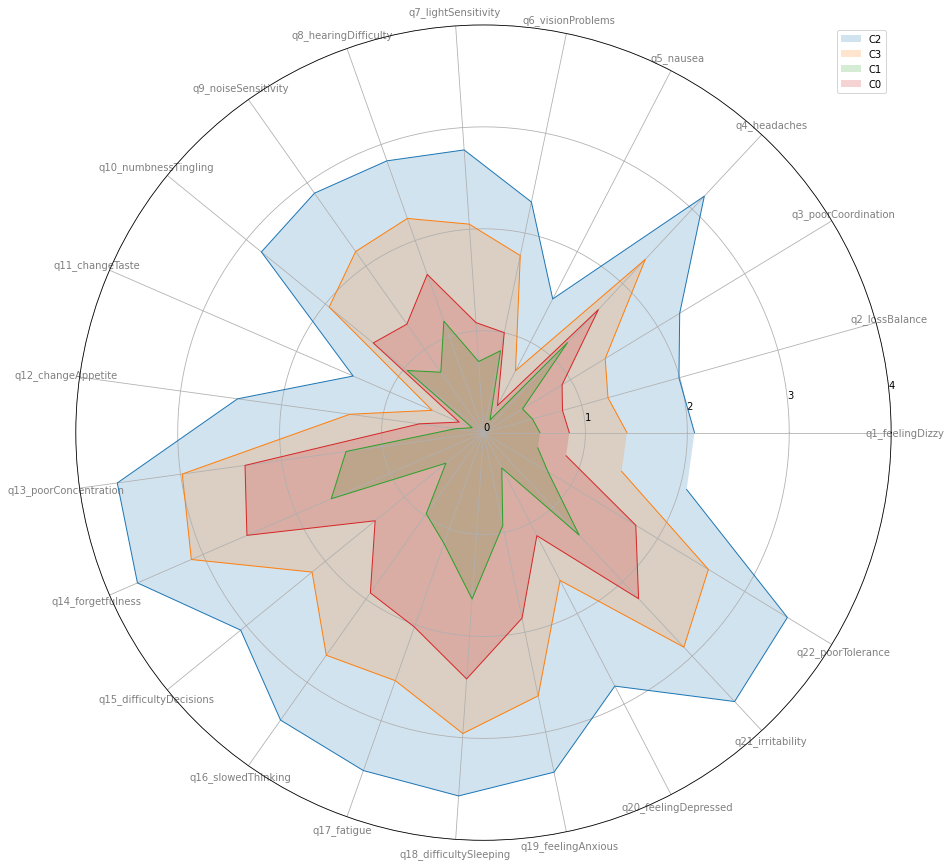

In [325]:
#create axis
#figure size
plt.figure(figsize=(20,15))
#subplot
ax = plt.subplot(111, polar=True)

# change the x ticks and y ticks
ax.set_thetagrids(np.degrees(angles), column_names)
plt.xticks(angles[:-1], column_names, color='grey', size=10)

#radius of each value
ax.set_rlabel_position(6)
plt.yticks([0,1,2, 3, 4], ["0","1","2", "3", "4"], size=10)
plt.ylim(0,4)

#for loop with all 4 clusters
uniq_clus = nsi_adm_temp.cluster.unique()
for i in range(len(uniq_clus)):
    print("Plotting for cluster: ", uniq_clus[i])
    values = nsi_adm_temp[nsi_adm_temp['cluster'] == uniq_clus[i]][question_cols].mean(axis=0).values
    values = np.append(values, values[:1])
    #Plot the values
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, alpha=0.2,label = 'C' + str(uniq_clus[i]))


plt.legend()

### Find the optimal number of clusters for Discharges using KMeans

In [326]:
#plot the sum of squares error with a for loop from clusters ex.1-20
#Lists for sum of squared distances, no of clusters, and cluster centers
ss_distances_d = []
no_of_clusters_d = []
cluster_centers_1 = []

for k in range(1,20):
    print("Number of cluster: ", k)
    #kmeans
    kmeans = KMeans(n_clusters=k, max_iter=100, verbose=0, random_state=3)
    kmeans.fit(nsi_dis_temp) 
    no_of_clusters_d.append(k) 
    cluster_centers_1.append(k)
    ss_distances_d.append(kmeans.inertia_)

Number of cluster:  1
Number of cluster:  2
Number of cluster:  3
Number of cluster:  4
Number of cluster:  5
Number of cluster:  6
Number of cluster:  7
Number of cluster:  8
Number of cluster:  9
Number of cluster:  10
Number of cluster:  11
Number of cluster:  12
Number of cluster:  13
Number of cluster:  14
Number of cluster:  15
Number of cluster:  16
Number of cluster:  17
Number of cluster:  18
Number of cluster:  19


In [327]:
ss_distances_d

[33318.04936624416,
 21745.386120326304,
 19003.694637073113,
 17960.839276451956,
 17261.26598843461,
 16784.57374178292,
 16360.601376884013,
 16018.86340316029,
 15752.739714053716,
 15557.730316256013,
 15348.291380392215,
 15169.940334229675,
 15010.139683769126,
 14849.342536740518,
 14705.108826173131,
 14548.795686524436,
 14441.136122834761,
 14308.029029513627,
 14200.70362079641]

In [328]:
no_of_clusters_d

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

### Elbow Method

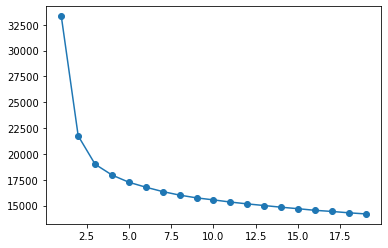

In [329]:
plt.plot(no_of_clusters_d, ss_distances_d, marker='o')

In [330]:
#elobow plot shows 4 clusters as the optimal value for k
kmeans = KMeans(n_clusters=4, max_iter=100, verbose=0, random_state=0)
kmeans.fit(nsi_dis_temp)

KMeans(max_iter=100, n_clusters=4, random_state=0)

In [331]:
#predict the closest cluster that each row belongs to
pred_clusters = kmeans.predict(nsi_dis_temp)

In [333]:
nsi_dis_temp['cluster'] = pred_clusters
nsi_dis_temp.cluster.value_counts()

0    540
3    524
2    308
1    127
Name: cluster, dtype: int64

In [334]:
nsi_dis_temp.columns

Index(['q1_feelingDizzy', 'q2_lossBalance', 'q3_poorCoordination',
       'q4_headaches', 'q5_nausea', 'q6_visionProblems', 'q7_lightSensitivity',
       'q8_hearingDifficulty', 'q9_noiseSensitivity', 'q10_numbnessTingling',
       'q11_changeTaste', 'q12_changeAppetite', 'q13_poorConcentration',
       'q14_forgetfulness', 'q15_difficultyDecisions', 'q16_slowedThinking',
       'q17_fatigue', 'q18_difficultySleeping', 'q19_feelingAnxious',
       'q20_feelingDepressed', 'q21_irritability', 'q22_poorTolerance',
       'cluster'],
      dtype='object')

In [335]:
nsi_dis_temp

,q1_feelingDizzy,q2_lossBalance,q3_poorCoordination,q4_headaches,q5_nausea,q6_visionProblems,q7_lightSensitivity,q8_hearingDifficulty,q9_noiseSensitivity,q10_numbnessTingling,...,q14_forgetfulness,q15_difficultyDecisions,q16_slowedThinking,q17_fatigue,q18_difficultySleeping,q19_feelingAnxious,q20_feelingDepressed,q21_irritability,q22_poorTolerance,cluster
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
6,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,2.0,1.0,2.0,0.0,1.0,2.0,2.0,3.0,1.0,3
7,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,0.0,...,2.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,2.0,3
12,3.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,3.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0
3422,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,3
3423,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,4.0,3.0,4.0,2.0,3.0,3.0,2.0,4.0,3.0,1
3424,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0


### Radar Chart for Discharges

In [336]:
#call list of questions
question_cols

['q1_feelingDizzy',
 'q2_lossBalance',
 'q3_poorCoordination',
 'q4_headaches',
 'q5_nausea',
 'q6_visionProblems',
 'q7_lightSensitivity',
 'q8_hearingDifficulty',
 'q9_noiseSensitivity',
 'q10_numbnessTingling',
 'q11_changeTaste',
 'q12_changeAppetite',
 'q13_poorConcentration',
 'q14_forgetfulness',
 'q15_difficultyDecisions',
 'q16_slowedThinking',
 'q17_fatigue',
 'q18_difficultySleeping',
 'q19_feelingAnxious',
 'q20_feelingDepressed',
 'q21_irritability',
 'q22_poorTolerance']

In [337]:
nsi_dis_temp.cluster.value_counts()

0    540
3    524
2    308
1    127
Name: cluster, dtype: int64

In [338]:
#append with 1st column to start at 0 degrees and end at 360 degrees
column_names = np.append(question_cols, question_cols[:1])
column_names

array(['q1_feelingDizzy', 'q2_lossBalance', 'q3_poorCoordination',
       'q4_headaches', 'q5_nausea', 'q6_visionProblems',
       'q7_lightSensitivity', 'q8_hearingDifficulty',
       'q9_noiseSensitivity', 'q10_numbnessTingling', 'q11_changeTaste',
       'q12_changeAppetite', 'q13_poorConcentration', 'q14_forgetfulness',
       'q15_difficultyDecisions', 'q16_slowedThinking', 'q17_fatigue',
       'q18_difficultySleeping', 'q19_feelingAnxious',
       'q20_feelingDepressed', 'q21_irritability', 'q22_poorTolerance',
       'q1_feelingDizzy'], dtype='<U23')

In [339]:
#form Unique cluster
uniq_clus = nsi_dis_temp.cluster.unique()
uniq_clus

array([0, 3, 2, 1], dtype=int32)

In [340]:
#for loop for unique cluster
for i in range(len(uniq_clus)):
    print(i)
    print("cluster: ", uniq_clus[i])

0
cluster:  0
1
cluster:  3
2
cluster:  2
3
cluster:  1


In [341]:
#
angles=np.linspace(0, 2*np.pi, len(column_names), endpoint=False)
angles

array([0.        , 0.27318197, 0.54636394, 0.81954591, 1.09272788,
       1.36590985, 1.63909182, 1.91227379, 2.18545576, 2.45863773,
       2.7318197 , 3.00500167, 3.27818364, 3.55136561, 3.82454758,
       4.09772955, 4.37091152, 4.64409349, 4.91727546, 5.19045743,
       5.4636394 , 5.73682137, 6.01000334])

Plotting for cluster:  0
Plotting for cluster:  3
Plotting for cluster:  2
Plotting for cluster:  1


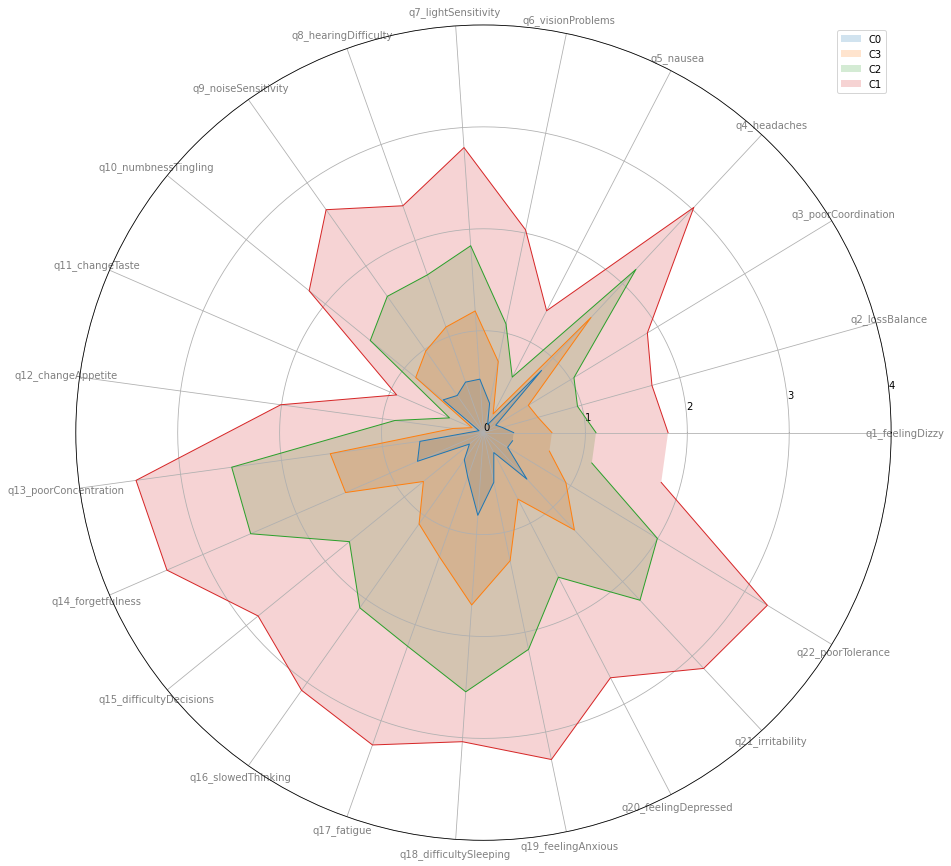

In [342]:
#create axis
#figure size
plt.figure(figsize=(20,15))
#subplot
ax = plt.subplot(111, polar=True)

# change the x ticks and y ticks
ax.set_thetagrids(np.degrees(angles), column_names)
plt.xticks(angles[:-1], column_names, color='grey', size=10)

#radius of each value
ax.set_rlabel_position(6)
plt.yticks([0,1,2, 3, 4], ["0","1","2", "3", "4"], size=10)
plt.ylim(0,4)

#for loop with all 4 clusters
uniq_clus = nsi_dis_temp.cluster.unique()
for i in range(len(uniq_clus)):
    print("Plotting for cluster: ", uniq_clus[i])
    values = nsi_dis_temp[nsi_dis_temp['cluster'] == uniq_clus[i]][question_cols].mean(axis=0).values
    values = np.append(values, values[:1])
    #Plot the values
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, alpha=0.2,label = 'C' + str(uniq_clus[i]))


plt.legend()

### Confusion Matrix

In [343]:
nsi_adm_temp.shape

(1499, 23)

In [344]:
#add back in PersonID for admin
nsi_adm = nsi_df_adm_drop_dup[['PersonID']].merge(nsi_adm_temp, how='inner', left_index=True, right_index=True)

In [345]:
nsi_adm

,PersonID,q1_feelingDizzy,q2_lossBalance,q3_poorCoordination,q4_headaches,q5_nausea,q6_visionProblems,q7_lightSensitivity,q8_hearingDifficulty,q9_noiseSensitivity,...,q14_forgetfulness,q15_difficultyDecisions,q16_slowedThinking,q17_fatigue,q18_difficultySleeping,q19_feelingAnxious,q20_feelingDepressed,q21_irritability,q22_poorTolerance,cluster
0,1244,2.0,2.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,...,4.0,2.0,4.0,4.0,4.0,2.0,2.0,4.0,3.0,2
1,1341,0.0,0.0,2.0,1.0,0.0,2.0,1.0,2.0,2.0,...,3.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3
2,256,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,2.0,...,2.0,0.0,1.0,2.0,2.0,1.0,0.0,3.0,1.0,1
3,127,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,...,4.0,3.0,4.0,3.0,1.0,3.0,1.0,3.0,3.0,3
8,1770,1.0,1.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,1317,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,2.0,...,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,2.0,3
3406,216,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,...,3.0,2.0,3.0,2.0,3.0,2.0,1.0,2.0,2.0,3
3407,822,1.0,2.0,2.0,1.0,0.0,1.0,2.0,2.0,4.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3
3413,1382,2.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0


In [346]:
nsi_dis_temp.shape

(1499, 23)

In [347]:
#add back in PersonID for admin
nsi_dis = nsi_df_dis_drop_dup[['PersonID']].merge(nsi_dis_temp, how='inner', left_index=True, right_index=True)

In [348]:
nsi_dis

,PersonID,q1_feelingDizzy,q2_lossBalance,q3_poorCoordination,q4_headaches,q5_nausea,q6_visionProblems,q7_lightSensitivity,q8_hearingDifficulty,q9_noiseSensitivity,...,q14_forgetfulness,q15_difficultyDecisions,q16_slowedThinking,q17_fatigue,q18_difficultySleeping,q19_feelingAnxious,q20_feelingDepressed,q21_irritability,q22_poorTolerance,cluster
4,869,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
5,895,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
6,1428,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,2.0,1.0,2.0,0.0,1.0,2.0,2.0,3.0,1.0,3
7,1345,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,2.0,3
12,1314,3.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,1317,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,3.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0
3422,822,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,...,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,3
3423,216,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,...,4.0,3.0,4.0,2.0,3.0,3.0,2.0,4.0,3.0,1
3424,1382,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0


In [349]:
final_comp_adm = nsi_adm[["PersonID", "cluster"]]
final_comp_adm.columns = ["PersonID", "admin_cluster"]

In [350]:
final_comp_dis = nsi_dis[["PersonID", "cluster"]]
final_comp_dis.columns = ["PersonID", "discharge_cluster"]

In [351]:
final_comp_adm_dis = pd.merge(final_comp_adm, final_comp_dis, on='PersonID')[["PersonID", "admin_cluster", "discharge_cluster"]]
final_comp_adm_dis.columns = ["PersonID", "admin_cluster", "discharge_cluster"]

In [352]:
final_comp_adm_dis

,PersonID,admin_cluster,discharge_cluster
0,1244,2,3
1,1341,3,0
2,256,1,0
3,127,3,3
4,1770,2,2
...,...,...,...
1494,1317,3,0
1495,216,3,1
1496,822,3,3
1497,1382,0,0


In [353]:
pd.crosstab(final_comp_adm_dis['admin_cluster'], final_comp_adm_dis['discharge_cluster'])

discharge_cluster,0,1,2,3
admin_cluster,,,,
0,184,5,77,196
1,264,1,9,105
2,14,87,90,50
3,78,34,132,173
